In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [59]:
def process_titanic_dataframe(data):
    cData = data.copy()
    del cData['PassengerId']
    del cData['Name']
    del cData['Ticket']
    del cData['Cabin']
    del cData['Embarked']
    cData['Male'] = (cData['Sex'] == 'male')*1
    return cData

In [68]:
cData = process_titanic_dataframe(data)

In [69]:
cData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [70]:
original_size = cData.shape[0]
cData = cData.dropna()
new_size = cData.shape[0]

original_size - new_size

177

In [71]:
cData.shape

(714, 8)

In [72]:
cData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [73]:
cData.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994
Male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000


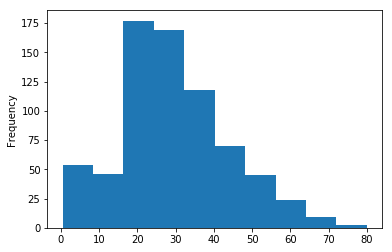

In [74]:
# plt.figure()
cData['Age'].plot.hist()

In [75]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male']
X = cData[features]
y = cData['Survived']

In [285]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [286]:
test = pd.read_csv('test.csv')
test_result = pd.read_csv('gender_submission.csv')
merge = test.join(test_result,how='outer',lsuffix='_l')
merge = merge.copy()


In [287]:
merge = process_titanic_dataframe(merge)
test_original_size = merge.shape[0]
merge = merge.dropna()
test_new_size = merge.shape[0]
print (test_original_size - test_new_size )
print (test_original_size)
y_test = merge['Survived']
X_test = merge[features]

87
418


In [288]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [289]:
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [290]:
merge.head()

,PassengerId_l,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Male
0,892,3,male,34.5,0,0,7.8292,0,1
1,893,3,female,47.0,1,0,7.0000,1,0
2,894,2,male,62.0,0,0,9.6875,0,1
3,895,3,male,27.0,0,0,8.6625,0,1
4,896,3,female,22.0,1,1,12.2875,1,0


In [316]:
survival_classifier = DecisionTreeClassifier(max_leaf_nodes=2)
survival_classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [317]:
predictions = survival_classifier.predict(X_test)

In [318]:
accuracy_score(y_true = y_test, y_pred = predictions) * 100

100.0

In [321]:
def plot_accuracy():
    acrrs = []
    for i in range(2,300):
        survival_classifier = DecisionTreeClassifier(max_leaf_nodes=i)
        survival_classifier.fit(X, y)
        predictions = survival_classifier.predict(X_test)
        accuracy = accuracy_score(y_true = y_test, y_pred = predictions)
        acrrs.append(accuracy)
    plt.pyplot.plot(acrrs)

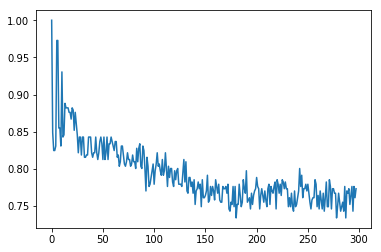

In [322]:
plot_accuracy()